# Usage Demo : 


In [107]:
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mgeval import core, utils
from sklearn.model_selection import LeaveOneOut

## Absolute measurement: statistic analysis


Assign dataset path

In [108]:
set1 = glob.glob('./midi_data_base/*')
print(set1)
print(len(set1))


['./midi_data_base/sample_347.midi', './midi_data_base/sample_22.midi', './midi_data_base/sample_202.midi', './midi_data_base/sample_193.midi', './midi_data_base/sample_310.midi', './midi_data_base/sample_255.midi', './midi_data_base/sample_75.midi', './midi_data_base/sample_185.midi', './midi_data_base/sample_306.midi', './midi_data_base/sample_63.midi', './midi_data_base/sample_243.midi', './midi_data_base/sample_214.midi', './midi_data_base/sample_34.midi', './midi_data_base/sample_146.midi', './midi_data_base/sample_280.midi', './midi_data_base/sample_111.midi', './midi_data_base/sample_18.midi', './midi_data_base/sample_238.midi', './midi_data_base/sample_107.midi', './midi_data_base/sample_150.midi', './midi_data_base/sample_59.midi', './midi_data_base/sample_279.midi', './midi_data_base/sample_296.midi', './midi_data_base/sample_127.midi', './midi_data_base/sample_96.midi', './midi_data_base/sample_79.midi', './midi_data_base/sample_259.midi', './midi_data_base/sample_170.midi',

In [109]:
set2 = glob.glob('./midi_data_oneshot/*')
print(set2)
print(len(set2))

['./midi_data_oneshot/sample_347.midi', './midi_data_oneshot/sample_22.midi', './midi_data_oneshot/sample_202.midi', './midi_data_oneshot/sample_193.midi', './midi_data_oneshot/sample_310.midi', './midi_data_oneshot/sample_255.midi', './midi_data_oneshot/sample_75.midi', './midi_data_oneshot/sample_185.midi', './midi_data_oneshot/sample_306.midi', './midi_data_oneshot/sample_63.midi', './midi_data_oneshot/sample_243.midi', './midi_data_oneshot/sample_351.midi', './midi_data_oneshot/sample_214.midi', './midi_data_oneshot/sample_34.midi', './midi_data_oneshot/sample_146.midi', './midi_data_oneshot/sample_280.midi', './midi_data_oneshot/sample_111.midi', './midi_data_oneshot/sample_18.midi', './midi_data_oneshot/sample_238.midi', './midi_data_oneshot/sample_107.midi', './midi_data_oneshot/sample_150.midi', './midi_data_oneshot/sample_59.midi', './midi_data_oneshot/sample_279.midi', './midi_data_oneshot/sample_296.midi', './midi_data_oneshot/sample_127.midi', './midi_data_oneshot/sample_96

construct empty dictionary to fill in measurement across samples

In [110]:
num_samples = 340

In [111]:
metrics = ['total_used_pitch', "avg_IOI", "pitch_range", "avg_pitch_shift"]
set1_eval = {}
set2_eval = {}
for metric in metrics:
    set1_eval[metric] = np.zeros((num_samples,1))
    set2_eval[metric] = np.zeros((num_samples,1))

In [112]:
metrics_list = list(set1_eval.keys())
for idx,metric in enumerate(metrics_list):
    for i in range(0, num_samples):
        feature = core.extract_feature(set1[i])
        set1_eval[metrics_list[idx]][i] = getattr(core.metrics(), metrics_list[idx])(feature)

repeat for second dataset

In [113]:
for idx,metric in enumerate(metrics_list):
    for i in range(0, num_samples):
        feature = core.extract_feature(set2[i])
        set2_eval[metrics_list[idx]][i] = getattr(core.metrics(), metrics_list[idx])(feature)

statistic analysis: absolute measurement

In [114]:
for i in range(0, len(metrics_list)):
    print(metrics_list[i] + ':')
    print('------------------------')
    print('dense')
    print('  mean: ', np.mean(set1_eval[metrics_list[i]], axis=0))
    print('  std: ', np.std(set1_eval[metrics_list[i]], axis=0))

    print('------------------------')
    print('oneshot')
    print('  mean: ', np.mean(set2_eval[metrics_list[i]], axis=0))
    print('  std: ', np.std(set2_eval[metrics_list[i]], axis=0))
    print('\n')


total_used_pitch:
------------------------
dense
  mean:  [11.34411765]
  std:  [2.70007529]
------------------------
oneshot
  mean:  [11.31764706]
  std:  [2.65224329]


avg_IOI:
------------------------
dense
  mean:  [0.2603355]
  std:  [0.12859236]
------------------------
oneshot
  mean:  [0.2731008]
  std:  [0.13093198]


pitch_range:
------------------------
dense
  mean:  [18.14411765]
  std:  [4.01465632]
------------------------
oneshot
  mean:  [17.91176471]
  std:  [3.85370446]


avg_pitch_shift:
------------------------
dense
  mean:  [2.6269222]
  std:  [0.55346802]
------------------------
oneshot
  mean:  [2.49432677]
  std:  [0.50807642]




## Relative measurement: generalizes the result among features with various dimensions


the features are sum- marized to 
- the intra-set distances
- the difference of intra-set and inter-set distances.

exhaustive cross-validation for intra-set distances measurement

In [115]:
print(metrics_list)

['total_used_pitch', 'avg_IOI', 'pitch_range', 'avg_pitch_shift']


In [116]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
set1_intra = np.zeros((num_samples, len(metrics_list), num_samples))
set2_intra = np.zeros((num_samples, len(metrics_list), num_samples))
for i, metric in enumerate(metrics_list):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        set1_intra[test_index[0]][i] = utils.c_dist(set1_eval[metric][test_index], set1_eval[metric])
        set2_intra[test_index[0]][i] = utils.c_dist(set2_eval[metric][test_index], set2_eval[metric])


exhaustive cross-validation for inter-set distances measurement

In [117]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
sets_inter = np.zeros((num_samples, len(metrics_list), num_samples))

for i, metric in enumerate(metrics_list):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        sets_inter[test_index[0]][i] = utils.c_dist(set1_eval[metric][test_index], set2_eval[metric])

visualization of intra-set and inter-set distances

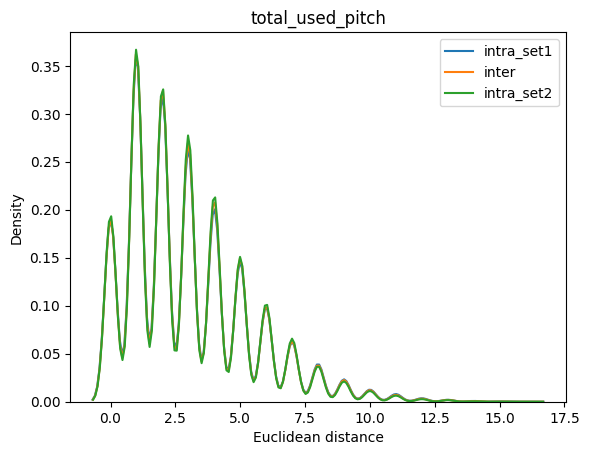

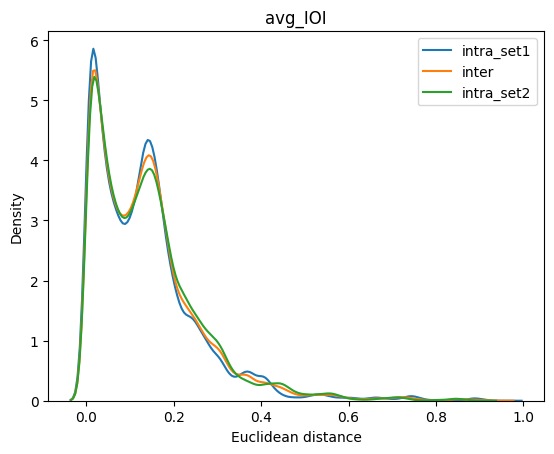

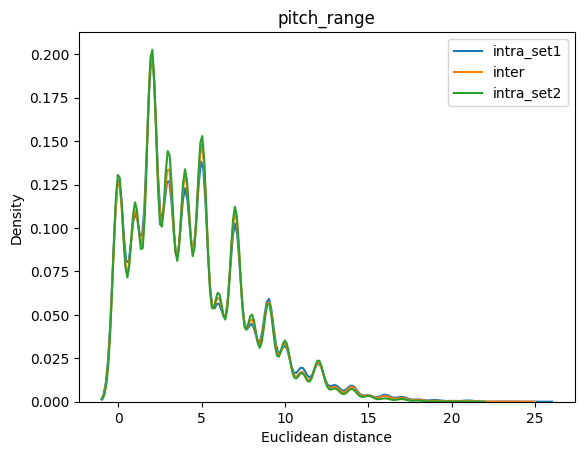

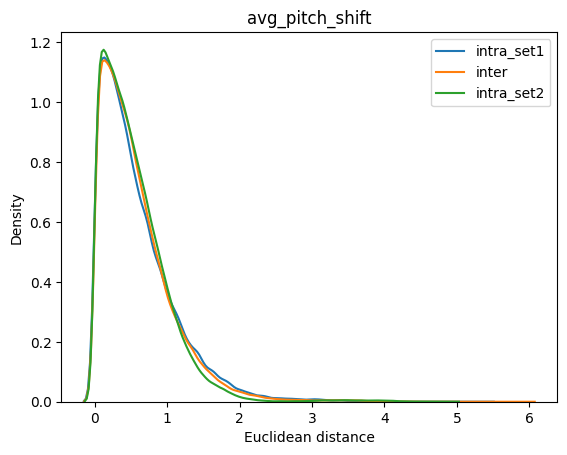

In [118]:
plot_set1_intra = np.transpose(set1_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_set2_intra = np.transpose(set2_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_sets_inter = np.transpose(sets_inter,(1, 0, 2)).reshape(len(metrics_list), -1)
for i in range(0,len(metrics_list)):
    sns.kdeplot(plot_set1_intra[i], label='intra_set1')
    sns.kdeplot(plot_sets_inter[i], label='inter')
    sns.kdeplot(plot_set2_intra[i], label='intra_set2')

    plt.title(metrics_list[i])
    plt.xlabel('Euclidean distance')
    plt.legend()
    plt.show()

the difference of intra-set and inter-set distances.